<img src="https://risk-engineering.org/static/img/logo-RE.png" width="100" alt="" style="float:right;margin:15px;">
This notebook is an element of the [risk-engineering.org courseware](https://risk-engineering.org/). It can be distributed under the terms of the [Creative Commons Attribution-ShareAlike licence](https://creativecommons.org/licenses/by-sa/4.0/).

Author: Eric Marsden <eric.marsden@risk-engineering.org>

---

This notebook contains an introduction to the use of [SciPy](https://www.scipy.org/) library's support for various probability distributions. The [library documentation](https://docs.scipy.org/doc/scipy-0.14.0/reference/stats.html) is available online. We also show how the [SymPy library](https://sympy.org/) for symbolic mathematics can be used to calculate various statistical properties analytically. 

In [1]:
import numpy
import scipy.stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_formats=['svg']

## Uniform distribution

Let’s generate 5 random variates from a continuous uniform distribution between 90 and 100 (the first argument to the `scipy.stats.uniform` function is the lower bound, and the second argument is the width). The object `u` will contain the “frozen distribution”.

In [2]:
u = scipy.stats.uniform(90, 10)
u.rvs(5)

array([91.28694542, 99.02074913, 98.20863718, 96.03673172, 96.61385156])

Let’s check that the expected value of the distribution is around 95.

In [3]:
u.rvs(1000).mean()

95.05355549164224

Let’s check that around 20% of the variates are less than 92.

In [4]:
(u.rvs(1000) < 92).sum() / 1000.0

0.205

We can also use the `stats` module of the [SymPy](https://sympy.org/) library to obtain the same information using an analytical (rather than stochastic) method.

In [5]:
import sympy.stats

us = sympy.stats.Uniform("unif", 90, 100)
# generate one random variate
sympy.stats.sample(us)

97.9252372185284

Check that the expected value (the mean of the distribution) is 95.

In [6]:
sympy.stats.E(us)

95

The probability of a random variate being less than 92:

In [7]:
sympy.stats.P(us < 92)

1/5

## Gaussian distribution

Consider a Gaussian (normal) distribution centered in 5, with a standard deviation of 1.

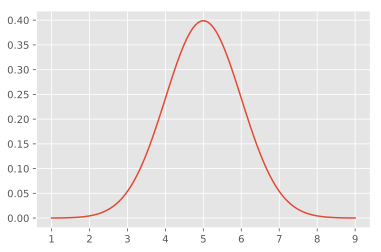

In [8]:
norm = scipy.stats.norm(5, 1)
x = numpy.linspace(1, 9, 100)
plt.plot(x, norm.pdf(x));

Check that half the distribution is located to the left of 5.

In [9]:
norm.cdf(5)

0.5

In [10]:
norm.ppf(0.5)

5.0

Find the first percentile of the distribution (the value of $x$ which has 1% of realizations to the left). Check that it is also equal to the 99% survival quantile.

In [11]:
norm.ppf(0.01)

2.6736521259591592

In [12]:
norm.isf(0.99)

2.6736521259591592

In [13]:
norm.cdf(norm.isf(0.99))

0.01

We can also execute some calculations on the normal distribution analytically, using the SymPy library. 

In [14]:
z = sympy.Symbol("z")
Norm = sympy.stats.Normal('Gaussian', 5, 1)
sympy.stats.density(Norm)(z)

sqrt(2)*exp(-(z - 5)**2/2)/(2*sqrt(pi))

In [15]:
# we ask for the evaluation to 30 significant figures
sympy.stats.density(Norm)(4).evalf(30)

0.241970724519143349797830192936

In [16]:
norm.pdf(4)

0.24197072451914337

In [17]:
# check that half of our distribution is greater than 5 (this is equivalent to the CDF(5))
sympy.stats.P(Norm > 5)

1/2

In [18]:
# check that the expected value (the mean) is 5
sympy.stats.E(Norm)

5

## Central limit theorem

The central limit theorem states that the mean of a set of random measurements will tend to a normal distribution, no matter the shape of the original measurement distribution. The property is also true of the sum of a set of random measurements. Let's test that in Python, simulating measurements from a uniform distribution between 30 and 40.

Procedure: take 100 measurements from the $U(30, 40)$ distribution, and calculate their mean. Repeat this 10000 times and plot a histogram of the means, which should be normally distributed.

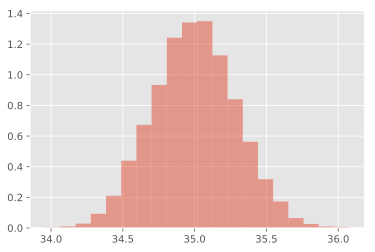

In [19]:
N = 10000
sim = numpy.zeros(N)
for i in range(N):
    sim[i] = numpy.random.uniform(30, 40, 100).mean()
plt.hist(sim, bins=20, alpha=0.5, density=True);

Exercise: try this with other probability distributions.

## Exponential distribution

The exponential distribution is often used in reliability engineering to represent failure of equipment which is not exposed to wear. The **hazard function**, or failure rate, of the exponential distribution is constant, equal to $\lambda$. Let's check the property that the expected value (or mean) of an exponential random variable is $\frac{1}{\lambda}$.

In [20]:
lbda = 25
obs = scipy.stats.expon(scale=1/float(lbda)).rvs(size=1000)
# the mean of 1000 random variates from the exponential distribution 
obs.mean()

0.040664928728887384

In [21]:
1/float(lbda)

0.04

Indeed, those are quite close! Let’s check another property of the exponential distribution: that the variance is equal to $\lambda^{-2}$.

In [22]:
obs.var()

0.0015875966073654322

In [23]:
1/float(lbda)**2

0.0016

And of course since the standard deviation is the square root of the variance, it should be equal to the expected value.

In [24]:
obs.std()

0.039844655944874616

As previously, we can also check these properties analytically, using the SymPy symbolic mathematics library, starting with the expected value:

In [25]:
exps = sympy.stats.Exponential("exp", lbda)
sympy.stats.E(exps)

1/25

In [26]:
# now check that the variance is lambda ^ -2
sympy.stats.variance(exps) - lbda**-2

0

In [27]:
# check that the standard deviation is equal to the expectation
sympy.stats.std(exps) - sympy.stats.E(exps)

0